In [1]:
print ("hello world!")   #python 2 uses no parens, print "hello world!"

hello world!


In [2]:
2+2

4

In [3]:
#import some random resources:
from numpy.random import random,randint
#and some plotting functions
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#generate 10 random numbers in the range 0 to 1
r=random(10)
r

array([0.0832041 , 0.2341816 , 0.08881879, 0.83279839, 0.97704579,
       0.74127032, 0.8668673 , 0.37053482, 0.94984435, 0.50006216])

In [6]:
r<.5

array([ True,  True,  True, False, False, False, False,  True, False,
       False])

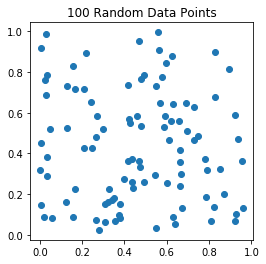

In [7]:
#have a look at random data points
plt.figure(figsize=(4,4))
xdata,ydata=random([2,100])
plt.plot(xdata, ydata, 'o')
plt.title('100 Random Data Points');

For more on [matplotlib](https://matplotlib.org/), see this [tutorial](https://matplotlib.org/users/pyplot_tutorial.html),
[gallery](https://matplotlib.org/gallery.html), and other [examples](http://matplotlib.org/examples/).

In [8]:
#or consider ten random integers in the range 0 to 19
randint(0,20,10)

array([10,  4, 18,  4,  3,  2, 13,  9, 16,  1])

In [9]:
#suppose we consider an experiment guessing the result of ten random coinflips
randint(0,2,10)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [10]:
#let 1 represent guessing correctly, so summing returns the number of correct guesses
sum(randint(0,2,10))

6

In [11]:
#collect data by repeating the experiment 1 million times
data=[sum(randint(0,2,10)) for i in range(1000000)] #xrange(1000000) in python 2

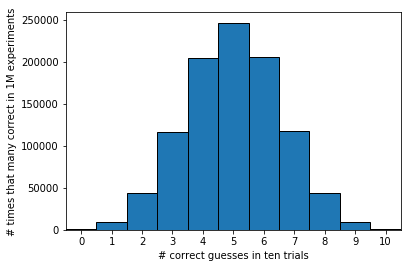

In [12]:
#have a look at the statistics
n,b,p=plt.hist(data,bins=range(0,12),align='left', ec='k')
plt.xlim(-.5,10.5)
plt.xticks(range(0,11))
plt.xlabel('# correct guesses in ten trials')
plt.ylabel('# times that many correct in 1M experiments');

In [13]:
#have a look at the probabilities
# probability of 0 correct or 10 correct should be 1/2**10 = 1/1024 = .0009765625
for i in range(11):
    print (i,n[i]/1000000)

0 0.000996
1 0.00976
2 0.043631
3 0.116547
4 0.205071
5 0.246625
6 0.205533
7 0.117287
8 0.043781
9 0.009792
10 0.000977


In [14]:
#probability of getting "lucky", with 8 or more correct is about 5.5%
sum(n[8:])/1000000

0.05455

In [15]:
# now permit variable number of trials per experiment
N=100000 # experiments
t=12  # trials per experiment
data=[sum(randint(0,2,t)) for i in range(N)]  #xrange(N) in python 2
# or could have used:  data = randint(0,2,[N,t]).sum(1)

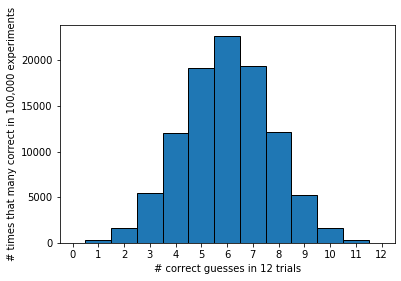

In [16]:
n,b,p=plt.hist(data,bins=range(t+2),align='left', ec='k')
plt.xlim(-.5,t+.5)
plt.xticks(range(0,t+1))
plt.xlabel('# correct guesses in {} trials'.format(t))
plt.ylabel('# times that many correct in {:,} experiments'.format(N));

In [17]:
#now the probability of getting 10,11, or 12 right is just under 2%
sum(n[t-2:])/N

0.01955

This is a case where we know the exact answer.
For a process with a binary (success/failure) outcome, and the probability of success in a single trial is $p$, the probability of m successes in t trials is $p(m) = {t\choose m}p^m(1-p)^{t-m}$, where ${t\choose m}=t!/m!(t-m)!$ is known as the binomial coefficient (provided as `scipy.misc.comb(t,m)`):

In [18]:
from scipy.special import comb

In [19]:
p=.5
t=10
for m in range(t+1):
    print (m,comb(t,m) * p**m * (1-p)**(t-m))
# in agreement with cell [11] above for N=1000000 experiments

0 0.0009765625
1 0.009765625
2 0.0439453125
3 0.1171875
4 0.205078125
5 0.24609375
6 0.205078125
7 0.1171875
8 0.0439453125
9 0.009765625
10 0.0009765625


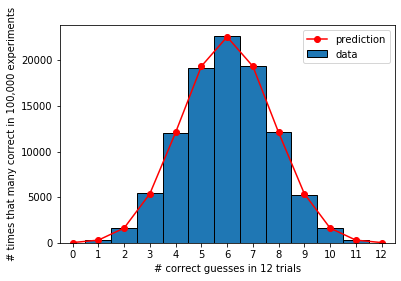

In [20]:
#there's also a built-in for the binomial distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
from scipy.stats import binom
#for t=10, try [binom.pmf(m,t,p) for m in range(t+1)], should give same result. 
#where .pmf() is the "probability mass function":
#here we'll use it to compare with above simulated data from cell [14]...

t=12
n,_,_=plt.hist(data,bins=range(t+2),align='left',label='data', ec='k')
plt.plot([N*binom.pmf(m,t,.5) for m in range(t+1)],'ro-',label='prediction')
plt.xlim(-.5,t+.5)
plt.xticks(range(0,t+1))
plt.xlabel('# correct guesses in {} trials'.format(t))
plt.ylabel('# times that many correct in {:,} experiments'.format(N))
plt.legend();

In [21]:
#we saw above that 10 of twelve correct had a less than 2% chance, any others?
#try at least eight of 9
(comb(9,8) + comb(9,9))/2**9

0.01953125

In [22]:
#or simulate
data=randint(0,2,[N,9]).sum(1)
sum(data>=8)/float(N)

0.01982

So without more information than given in [mold experiment](http://www.slate.com/articles/health_and_science/medical_examiner/2017/06/be_skeptical_and_don_t_take_anything_at_face_value.html) (please read), could have been (at least) either of the above. [actually was 10/12 correct, as excerpted from
[Through the Shadowlands](https://www.julierehmeyer.com/throughtheshadowlands/) (Rehmeyer, 2017)]:

> I started by taking matters into my own hands: I set out to prove I had a superpower. I wanted to demonstrate that I could reliably detect mold— or, well, whatever contaminants did me in, since I couldn’t be sure it was mold, or mold alone.

> To do it, I carried out the experiment I’d been pondering for months: I performed a **double-blind, placebo-controlled, randomized trial**, the kind often called the “gold standard of science.” I bought two identical packages containing a dozen washcloths each. I sent one package to a friend in Berkeley, asking him to open it and place the washcloths around his house (which was also the only house I’d lived in that had visible mold). For two weeks, the washcloths absorbed whatever was in the air there, and then my friend returned them to me.

> I kept the other package in my house in Santa Fe. These latter would act as a placebo control, since I had never experienced a mold reaction there.

> After I got the washcloths back, I performed a preliminary test—not the official, double-blind one to come—to convince myself that the Berkeley washcloths were indeed detectably contaminated and that the Santa Fe washcloths were okay. Standing next to the shower, naked and ready to quickly rinse off, I held one of the Santa Fe washcloths to my nose first. No problem.

> Then I breathed through a Berkeley washcloth. At first I thought, Damn, it didn’t work. This doesn’t bother me at all! But after about 10 seconds, I felt a sensation like someone toying with a dimmer switch on my consciousness. After another five seconds, the contamination slammed through my nervous system, scrambling the wiring inside my body so that the only signal it seemed capable of carrying was pain.

> I threw the washcloth away from me and tried to get into the shower, but I couldn’t even get over the rim of the tub. John helped me, and the water, as always, restored order.

> The next day, we ran the experiment itself. My friend, Ondrej, a PhD physicist, manned the washcloths. Sitting alone at a table on the patio of my house, he flipped a coin, and if it came up heads, he chose a Berkeley washcloth; if tails, he chose a Santa Fe one. (That was the randomized part.) He then called John out and handed the selected washcloth to him. John carried the washcloth to me in the bathroom. (This was the “double-blind” part — neither I nor John knew whether the washcloth was from Santa Fe or Berkeley.)

> Next, I held the washcloth to my nose until I made my determination. If I declared the washcloth contaminated, I showered before the next one. John took the washcloth back to Ondrej, washed his hands, and got the next randomly chosen washcloth.

> We performed the same procedure on a friend who wasn’t a moldie, as an extra control. After all, if the Berkeley washcloths simply smelled musty, my detecting them wouldn’t be so impressive.

> When John handed me the first washcloth, I had to steel myself. I felt like I was about to punch myself in the face—or worse, completely embarrass myself by showing that I couldn’t distinguish the contaminated washcloths from the uncontaminated ones.

> Bam! Within seconds, the strength seemed to pour out of my body into a puddle on the floor. I whimpered and let the washcloth fall. John helped me stagger into the shower, and the strength poured back into me. John brought me the next washcloth. It was fine. The next one too, and the one after that.

> Bam! The fifth one slammed into me. Again, the strength poured out of me, and again, the shower poured it back in. 

> By the eighth washcloth, a contaminated one, the reaction was notably stronger, my body curling, my nerves screaming. John struggled to get me into the shower because I couldn’t lift my legs over the edge of the tub even with him supporting my torso. After that, I realized I was making this harder on myself than I had to, and I stayed inside the tub for the rest of the experiment.

> The violence of my reaction to the 12th washcloth frightened me. How much of this can my body take? I wasn’t recovering fully between the washcloths, and the image came to mind that I might go into convulsions. By then I’d determined that six washcloths were contaminated and six weren’t. Fuck this, I decided. I’ve obviously proven my point, so I don’t need to torture myself further in the name of science. My reactions were so clear that there’s no way could I have made a mistake. I stopped.

> Afterward, Ondrej reported the results: I had gotten 10 out of 12 correct, with one false positive and one false negative. My non-moldie friend, on the other hand, had done worse than chance and reported that he had absolutely no idea—the washcloths all seemed identical to him.

> How on earth did I get any wrong? Truly assessing what the results meant would require doing some statistics, but immediately, all I could think about was whether a Santa Fe washcloth and a Berkeley washcloth could have gotten switched, or if the Santa Fe washcloth I declared bad somehow got contaminated despite our precautions, or if I had rushed when I called the Berkeley one okay. I started scheming about repeating the experiment to get more data and to see if I could figure out what happened with my mistakes.

> But I spent the next day in a miserable miasma, and it took several days before I felt fully myself. The idea of inflicting that on myself again — ugh.

> And when I recovered and did the calculations, the results looked pretty good. If I’d just been guessing, with no ability to detect contamination at all, I would have had less than a two percent chance of doing as well as I did. In statistical terms, my experiment had a p-value of 0.019. The threshold for a result to be considered “statistically significant” (and hence publishable) was far looser, a p-value of less than 0.05.

> Woohoo! I could publish this! Scientific proof!

> Well, not really. I knew that my little experiment couldn’t really prove anything — all it could show was that I was unlikely to do as well as I did if I couldn’t detect the contaminated washcloths at all. That suggested, but didn’t prove, that I had my moldie superpower.

> Additionally, this was what a scientist would call an “n of 2” experiment — there were only two subjects, me and my non-moldie friend. At most, its conclusions applied only to the two of us. It couldn’t be generalized to say that other moldies truly detected mold, or that non-moldies couldn’t.

> Later, I asked statistician Philip Stark of the University of California, Berkeley to review my experiment. He declared it “pretty convincing” but pointed out that changing my study design by shortening the number of trials was a flaw that weakened the experiment a bit. My mind agreed; my body didn’t care. I decided I’d sacrificed myself for science quite enough, and I left it at that.